In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df = sns.load_dataset('flights')

In [6]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [14]:
df['yearMonth'] = "01-" + df['month'].astype(str)+"-" +df['year'].astype(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


In [17]:
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [18]:
df['yearMonth'] = pd.to_datetime(df['yearMonth'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [20]:
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [21]:
df.set_index('yearMonth',inplace=True)

In [22]:
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

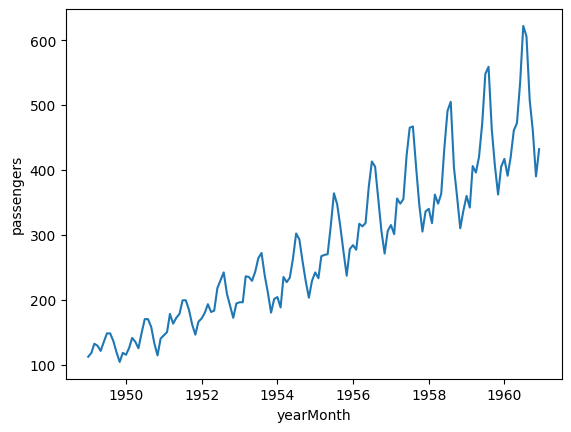

In [29]:
sns.lineplot(data = df, x=df.index, y= df.passengers)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose


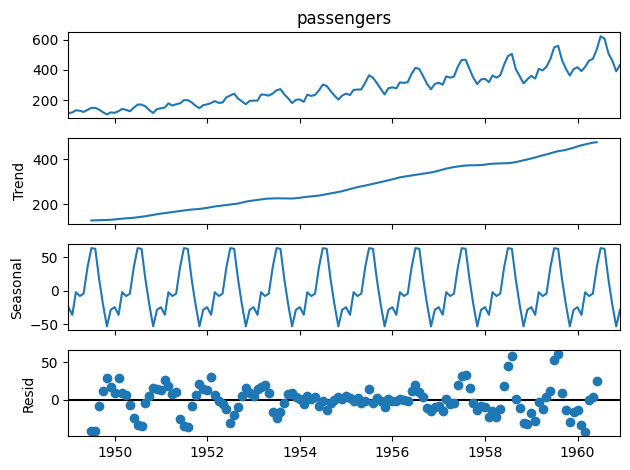

In [27]:
decomposition = seasonal_decompose(df['passengers'],period=12)
fig = decomposition.plot()

In [30]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

In [35]:
print(df['rollMean'])
print(df['rollStd'])

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


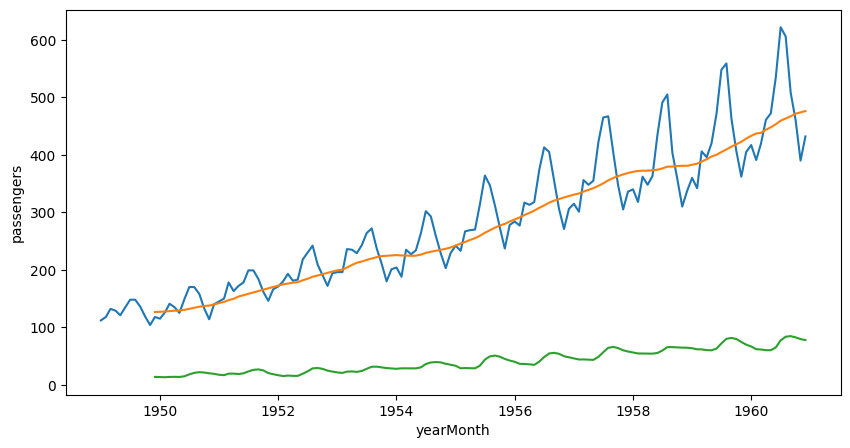

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)
plt.show()

In [ ]:
#conclusion: Mean is not stationary, SD is stationary; sp our data is not stationary

In [40]:
#Now let us perform the ADF test
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['passengers'])
print(adfTest) #Let us interpret these values below by converting into a series

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [41]:
stats= pd.Series(adfTest[0:4], index= ['Test Statistic', 'p-value', '#lags used' , 'number of observations used'])
print(stats)

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64


In [ ]:
H0: Time series is not stationary
#p-value >= 0.05: Do not reject the null hypothesis
ADF statistics is less negative

In [42]:
for key, values in adfTest[4].items():
    print('critically', key,":", values)

critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


In [46]:
#Time Shift

In [49]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    df['rollMean'] = df.passengers.rolling(window=12).mean()
    df['rollStd'] = df.passengers.rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df['passengers'])
    print(adfTest)

    stats= pd.Series(adfTest[0:4], index= ['Test Statistic', 'p-value', '#lags used' , 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
       print('critically', key,":", values)

    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x=df.index, y=df.passengers)
    sns.lineplot(data=df, x=df.index, y=df.rollMean)
    sns.lineplot(data=df, x=df.index, y=df.rollStd)
    plt.show()
    

    
    

In [50]:
air_df = df[['passengers']].copy() #Double brackets because it is a list within a list
print(air_df.head())

            passengers
yearMonth             
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [51]:
#Create a new column which will contain the shifted value from passengers column
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0


C:\Users\dai.STUDENTSDC\AppData\Local\Temp\ipykernel_12280\295396526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dai.STUDENTSDC\AppData\Local\Temp\ipykernel_12280\295396526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


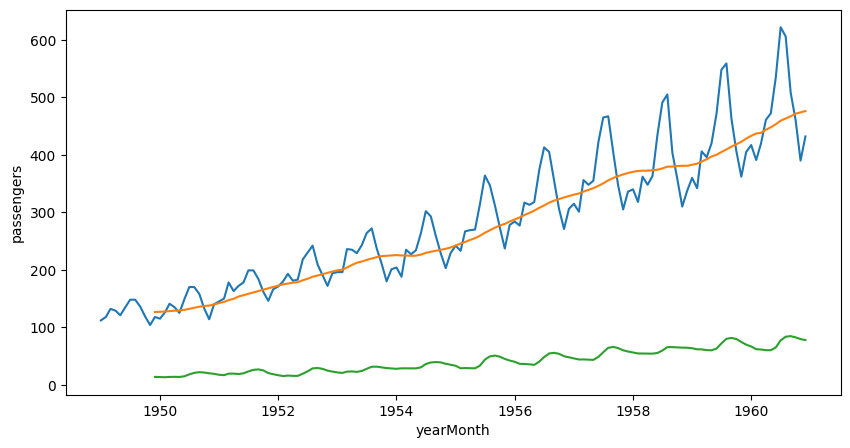

In [56]:
#Test stationarity
test_stationarity(air_df.dropna(), 'shiftDiff')
#p-value is just close to 0.05, sp let us try a shift of 2

In [54]:
air_df['shift'] = air_df['passengers'].shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0


C:\Users\dai.STUDENTSDC\AppData\Local\Temp\ipykernel_12280\295396526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dai.STUDENTSDC\AppData\Local\Temp\ipykernel_12280\295396526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


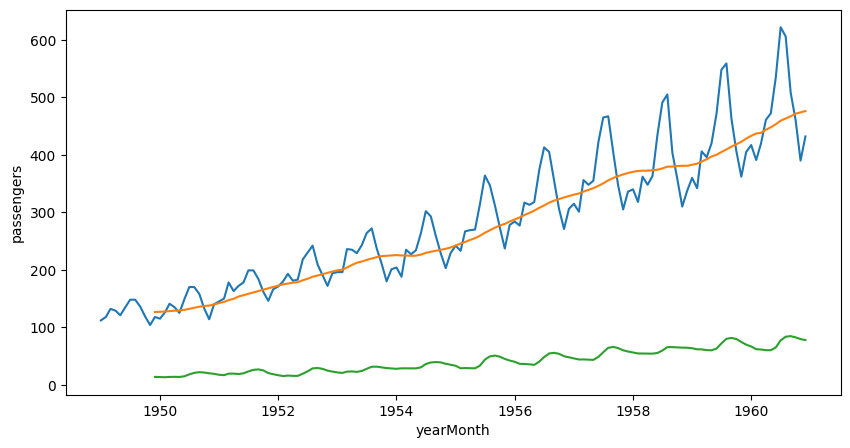

In [55]:
test_stationarity(air_df.dropna(), 'shiftDiff')

In [64]:
air_df['firstDiff'] = air_df['passengers'].diff()

In [65]:
air_df['Diff12'] = air_df['passengers'].diff(12)

In [66]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

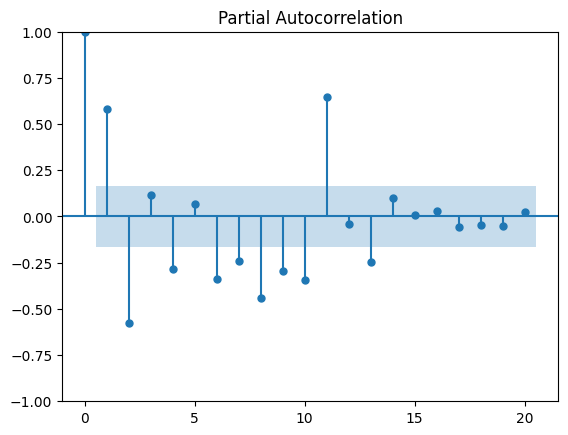

In [67]:
plot_pacf(air_df['shiftDiff'].dropna(),lags=20)
plt.show()

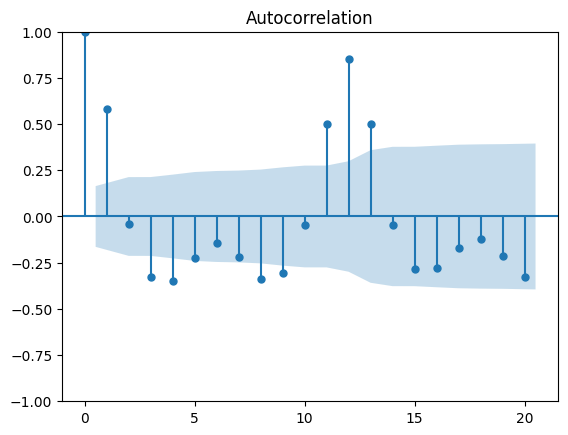

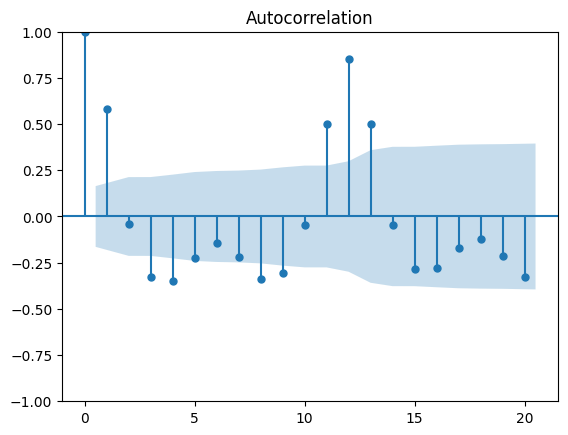

In [68]:
plot_acf(air_df['shiftDiff'].dropna(),lags=20)

In [72]:
#Building arima model
train = air_df[:round(len(air_df*70/100))]
print(train.tail())

            passengers  shift  shiftDiff  firstDiff  Diff12
yearMonth                                                  
1960-08-01         606  535.0       71.0      -16.0    47.0
1960-09-01         508  622.0     -114.0      -98.0    45.0
1960-10-01         461  606.0     -145.0      -47.0    54.0
1960-11-01         390  508.0     -118.0      -71.0    28.0
1960-12-01         432  461.0      -29.0       42.0    27.0


In [73]:
test =  air_df[round(len(air_df)*70/100) :]
print(test.head())

            passengers  shift  shiftDiff  firstDiff  Diff12
yearMonth                                                  
1957-06-01         422  348.0       74.0       67.0    48.0
1957-07-01         465  355.0      110.0       43.0    52.0
1957-08-01         467  422.0       45.0        2.0    62.0
1957-09-01         404  465.0      -61.0      -63.0    49.0
1957-10-01         347  467.0     -120.0      -57.0    41.0


SARIMAX

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
#Now SARIMAX prediction
model= SARIMAX(train['passengers'], order=(1,2,1), seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['sarimaxPred'] = prediction
print(air_df.tail())
#data looks better


C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  shift  shiftDiff  firstDiff  Diff12  sarimaxPred
yearMonth                                                               
1960-08-01         606  535.0       71.0      -16.0    47.0   632.067724
1960-09-01         508  622.0     -114.0      -98.0    45.0   508.929894
1960-10-01         461  606.0     -145.0      -47.0    54.0   445.757265
1960-11-01         390  508.0     -118.0      -71.0    28.0   406.461058
1960-12-01         432  461.0      -29.0       42.0    27.0   439.720154


            passengers  shift  shiftDiff  firstDiff  Diff12  sarimaxPred
yearMonth                                                               
1949-01-01         112    NaN        NaN        NaN     NaN          NaN
1949-02-01         118    NaN        NaN        6.0     NaN          NaN
1949-03-01         132  112.0       20.0       14.0     NaN          NaN
1949-04-01         129  118.0       11.0       -3.0     NaN          NaN
1949-05-01         121  132.0      -11.0       -8.0     NaN          NaN


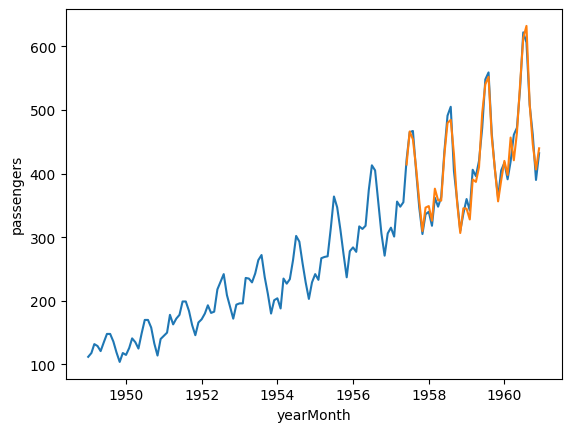

In [90]:
#plot
air_df.dropna()
print(air_df.head())
sns.lineplot(data=air_df, x=air_df.index, y= 'passengers')
sns.lineplot(data=air_df,x=air_df.index,y='sarimaxPred')
#sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')
plt.show()

In [81]:
#Compared to ARIMA<SARIMAX is much better
#Future prediction: First check the last date in our dataset
print(air_df.tail())

            passengers  shift  shiftDiff  firstDiff  Diff12  sarimaxPred
yearMonth                                                               
1960-08-01         606  535.0       71.0      -16.0    47.0   632.067724
1960-09-01         508  622.0     -114.0      -98.0    45.0   508.929894
1960-10-01         461  606.0     -145.0      -47.0    54.0   445.757265
1960-11-01         390  508.0     -118.0      -71.0    28.0   406.461058
1960-12-01         432  461.0      -29.0       42.0    27.0   439.720154


In [82]:
#MS: Month Start frequency
#Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01',
end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [83]:
#Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

1961-01-01    448.477653
1961-02-01    420.853934
1961-03-01    462.033517
1961-04-01    492.233575
1961-05-01    509.586478
1961-06-01    574.405462
1961-07-01    666.359377
1961-08-01    656.965213
1961-09-01    548.672490
1961-10-01    494.923876
1961-11-01    425.324160
1961-12-01    470.556259
1962-01-01    487.139946
1962-02-01    455.772485
1962-03-01    495.325626
1962-04-01    532.856714
1962-05-01    550.688812
1962-06-01    620.030878
1962-07-01    718.704865
1962-08-01    705.739771
1962-09-01    589.595535
1962-10-01    533.784274
1962-11-01    457.277550
1962-12-01    504.411024
Freq: MS, Name: predicted_mean, dtype: float64


ValueError: Could not interpret value `arimaPred` for `y`. An entry with this name does not appear in `data`.

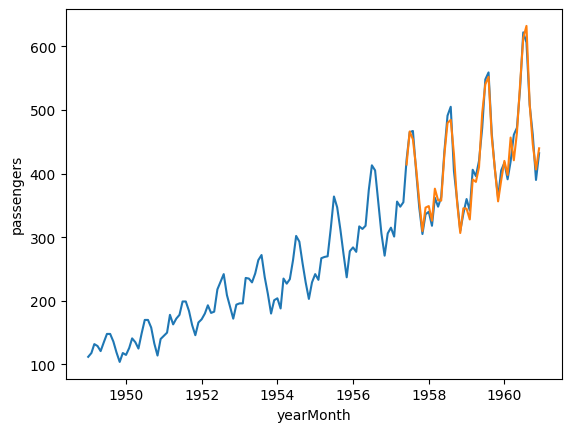

In [89]:
#Plot
air_df.dropna()
sns.lineplot(data=air_df,x=air_df.index,y='passengers')
sns.lineplot(data=air_df,x=air_df.index,y='sarimaxPred')
sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')